# Neural Network Classification with Pytorch

## 1. Make classification data and get it ready

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
# Make 1000 samples
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X {X[:5]}")
print(f"First 5 samples of y {y[:5]}")

First 5 samples of X [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y [1 1 1 1 0]


In [6]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\saket\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
# Make DataFrame of circle data
import pandas as pd

In [8]:

circles = pd.DataFrame({
    "X1" : X[:, 0],
    "X2" : X[:, 1],
    "label" : y
    })

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


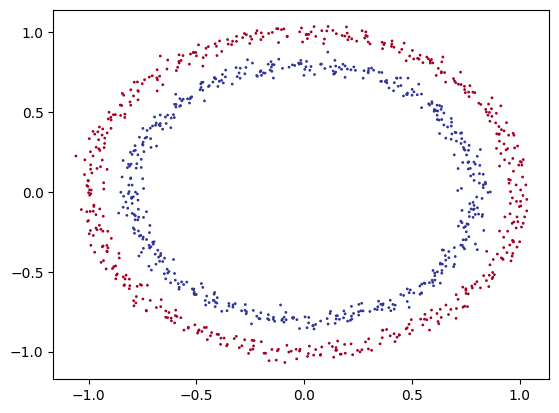

In [9]:
# Visualization 
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0], 
            y = X[:, 1],
            c = y,
            cmap=plt.cm.RdYlBu,
            s = 1
            )

In [10]:
# Check values and shapes of the features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X : {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of X : {X_sample.shape} and the same for y : {y_sample.shape}")

Values for one sample of X : [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of X : (2,) and the same for y : ()


## Turn data into tensors and split the data into train and test splits

In [11]:
import torch

In [12]:
type(X)

numpy.ndarray

In [13]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [14]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

In [18]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [19]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [20]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Refactoring our model

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [23]:
# Or we can also do this
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer = nn.Sequential(
#         nn.Linear(in_features=2, out_features=5),
#         nn.Linear(in_features=5, out_features=1)
#     ).to(device)

#     def forward(self, x):
#         return self.layer_2(self.layer(x))

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3020, -0.0725],
                      [ 0.0123, -0.5086],
                      [ 0.1153,  0.3579],
                      [-0.1346, -0.3471],
                      [-0.0554,  0.4357]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1652,  0.5018,  0.3486, -0.1211, -0.4299], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2571, -0.0743, -0.2962,  0.3314,  0.1004]], device='cuda:0')),
             ('1.bias', tensor([0.0037], device='cuda:0'))])

In [25]:
untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions : {len(untrained_preds)}\nShape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}\nShape : {X_test.shape}")
# print(f"Predictions : \n {untrained_preds[:10]}")
# print(f"Labels : \n {y_test[:10]}")

pd.DataFrame({"Untrained" : untrained_preds.detach().cpu().numpy().squeeze().round(), "Expected" : y_test.detach().cpu().numpy().squeeze()})

Length of predictions : 200
Shape : torch.Size([200, 1])
Length of test samples : 200
Shape : torch.Size([200, 2])


,Untrained,Expected
0,-0.0,1.0
1,-0.0,0.0
2,-0.0,1.0
3,-0.0,0.0
4,-0.0,1.0
...,...,...
195,-0.0,0.0
196,-0.0,1.0
197,-0.0,0.0
198,-0.0,1.0


## Loss function and optimizer

### For numbers we usually use MAE (Mean Absolute Error) or MSE (Mean Squared Error). This is regression
### For classification we use BCE (Binary Cross Entropy)

### For Optimizer, we generally use Adam or SGD

In [26]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [27]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct / len(y_pred) * 100

In [28]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [29]:
# Train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):

    model_0.train()

    y_logits = model_0.forward(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0.forward(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(f"Epoch : {epoch}")
        print(f"Train\t| Loss : {loss:.5f}\t| Accuracy : {acc}%")
        print(f"Test\t| Loss : {test_loss:.5f}\t| Accuracy : {test_acc}%")
        print()

Epoch : 0
Train	| Loss : 0.69840	| Accuracy : 50.0%
Test	| Loss : 0.69522	| Accuracy : 50.0%

Epoch : 10
Train	| Loss : 0.69600	| Accuracy : 47.875%
Test	| Loss : 0.69313	| Accuracy : 49.0%

Epoch : 20
Train	| Loss : 0.69494	| Accuracy : 44.375%
Test	| Loss : 0.69235	| Accuracy : 48.0%

Epoch : 30
Train	| Loss : 0.69440	| Accuracy : 47.125%
Test	| Loss : 0.69210	| Accuracy : 50.5%

Epoch : 40
Train	| Loss : 0.69409	| Accuracy : 47.25%
Test	| Loss : 0.69208	| Accuracy : 49.5%

Epoch : 50
Train	| Loss : 0.69388	| Accuracy : 47.625%
Test	| Loss : 0.69215	| Accuracy : 49.0%

Epoch : 60
Train	| Loss : 0.69372	| Accuracy : 48.25%
Test	| Loss : 0.69227	| Accuracy : 49.0%

Epoch : 70
Train	| Loss : 0.69359	| Accuracy : 48.25%
Test	| Loss : 0.69240	| Accuracy : 51.5%

Epoch : 80
Train	| Loss : 0.69349	| Accuracy : 48.875%
Test	| Loss : 0.69254	| Accuracy : 52.0%

Epoch : 90
Train	| Loss : 0.69341	| Accuracy : 48.625%
Test	| Loss : 0.69268	| Accuracy : 50.5%



In [30]:
# Check why model isn't learning
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already done)
if Path("helper_functions.py").is_file():
    print("Exists! Skipping downlad")
else:
    print("Downloading file...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Exists! Skipping downlad


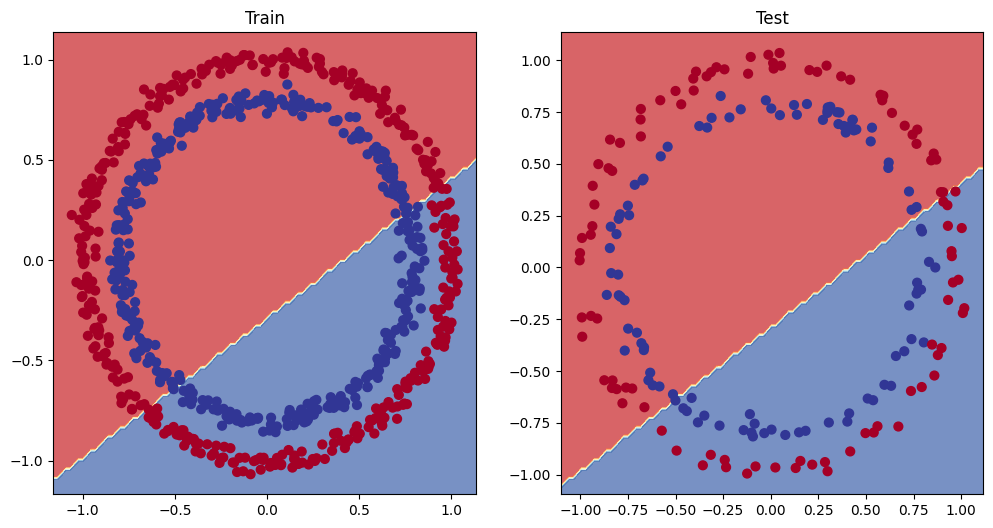

In [31]:
# Plot and visualize
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [32]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [34]:
# Run the loop again

epochs = 1000

for epoch in range(epochs):
    
    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    with torch.inference_mode():
        model_1.eval()
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        acc = accuracy_fn(y_test, test_preds)
    
    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss} | Acc : {acc}% | Test Acc : {test_acc}%")

Epoch : 0 | Loss : 0.6939550638198853 | Test loss : 0.6926146745681763 | Acc : 51.0% | Test Acc : 50.0%
Epoch : 100 | Loss : 0.6930478811264038 | Test loss : 0.6937904357910156 | Acc : 48.0% | Test Acc : 50.0%
Epoch : 200 | Loss : 0.6929859519004822 | Test loss : 0.6943727135658264 | Acc : 46.0% | Test Acc : 50.0%
Epoch : 300 | Loss : 0.6929804682731628 | Test loss : 0.6945767998695374 | Acc : 45.0% | Test Acc : 50.0%
Epoch : 400 | Loss : 0.6929798722267151 | Test loss : 0.6946452260017395 | Acc : 46.0% | Test Acc : 50.0%
Epoch : 500 | Loss : 0.6929798722267151 | Test loss : 0.6946680545806885 | Acc : 46.0% | Test Acc : 50.0%
Epoch : 600 | Loss : 0.6929798722267151 | Test loss : 0.6946756839752197 | Acc : 46.0% | Test Acc : 50.0%
Epoch : 700 | Loss : 0.6929798722267151 | Test loss : 0.6946782469749451 | Acc : 46.0% | Test Acc : 50.0%
Epoch : 800 | Loss : 0.6929798722267151 | Test loss : 0.6946790814399719 | Acc : 46.0% | Test Acc : 50.0%
Epoch : 900 | Loss : 0.6929798722267151 | Test l

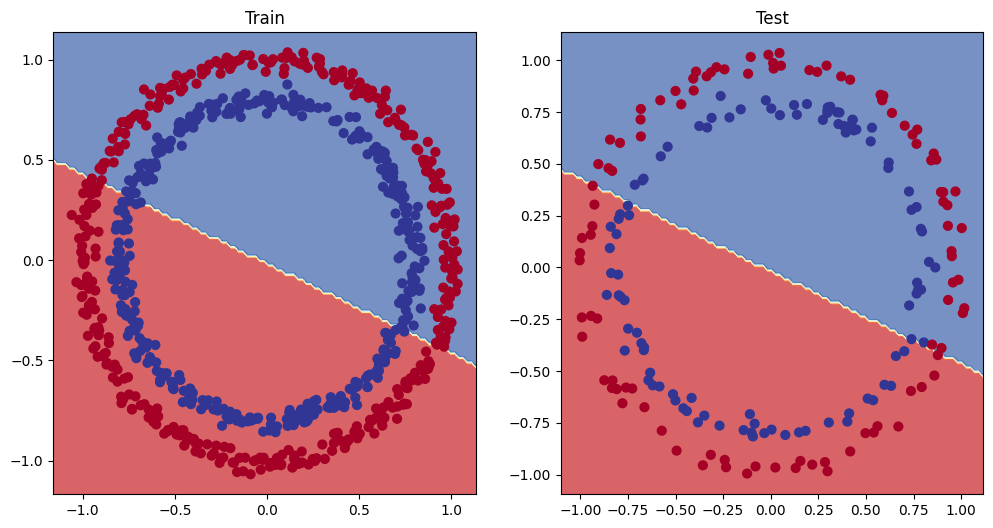

In [35]:
# Plot and visualize
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [41]:
# Building with non linearity
class CircleModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_2 = CircleModelV2().to(device)

In [42]:
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [55]:
epochs = 1000

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model_2.train()

    y_logits = model_2(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        
        test_logits = model_2(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_preds, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Loss : {loss} | Acc : {acc}% | Test Loss : {test_loss} | Test acc : {test_acc}")


Epoch : 0 | Loss : 0.6807464361190796 | Acc : 63.125% | Test Loss : 0.7006901502609253 | Test acc : 57.49999999999999
Epoch : 100 | Loss : 0.6720587015151978 | Acc : 67.0% | Test Loss : 0.6906901597976685 | Test acc : 59.5
Epoch : 200 | Loss : 0.6584344506263733 | Acc : 65.125% | Test Loss : 0.6913883686065674 | Test acc : 59.0
Epoch : 300 | Loss : 0.6352269649505615 | Acc : 68.25% | Test Loss : 0.6932877898216248 | Test acc : 58.5
Epoch : 400 | Loss : 0.5897273421287537 | Acc : 83.25% | Test Loss : 0.6140981316566467 | Test acc : 76.5
Epoch : 500 | Loss : 0.5062574148178101 | Acc : 95.0% | Test Loss : 0.5351039171218872 | Test acc : 93.5
Epoch : 600 | Loss : 0.3866523206233978 | Acc : 99.375% | Test Loss : 0.5144056081771851 | Test acc : 98.0
Epoch : 700 | Loss : 0.26057520508766174 | Acc : 99.875% | Test Loss : 0.5063050389289856 | Test acc : 99.5
Epoch : 800 | Loss : 0.16714617609977722 | Acc : 100.0% | Test Loss : 0.5063050389289856 | Test acc : 99.5
Epoch : 900 | Loss : 0.11152812

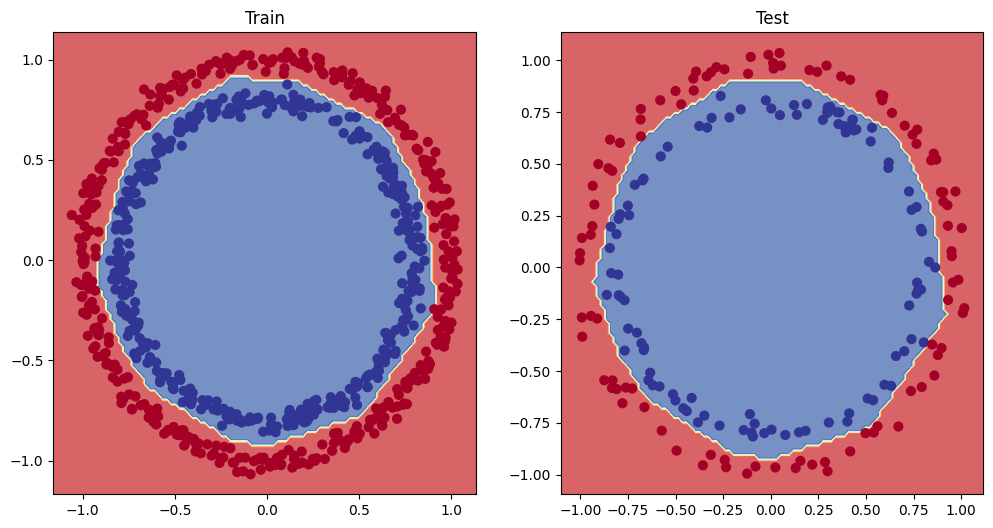

In [56]:
# Plot and visualize
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)